In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
study_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
len(study_results["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_data = study_data.sort_values(by=["Mouse ID","Timepoint"])
study_data = study_data[["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites","Drug Regimen","Sex","Age_months","Weight (g)"]]
clean_data = study_data.drop(study_data[study_data["Mouse ID"] == "g989"].index)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
454,a203,0,45.000000,0,Infubinol,Female,20,23
455,a203,5,48.508468,0,Infubinol,Female,20,23
456,a203,10,51.852437,1,Infubinol,Female,20,23
457,a203,15,52.777870,1,Infubinol,Female,20,23
458,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [5]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_type = clean_data.groupby('Drug Regimen')
drug_type_mean = drug_type['Tumor Volume (mm3)'].mean()
drug_type_median = drug_type['Tumor Volume (mm3)'].median()
drug_type_std = drug_type['Tumor Volume (mm3)'].std()
drug_type_sem = drug_type['Tumor Volume (mm3)'].sem()

#print(drug_type_mean)
#print(drug_type_median)
#print(drug_type_std)
#print(drug_type_sem)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_stats = pd.DataFrame({"Mean Tumor Volume":[drug_type_mean],"Median Tumor Volume":[drug_type_median],"STD of Tumors":[drug_type_std],"SEM of Tumors":[drug_type_sem]})
print(tumor_stats)

                                   Mean Tumor Volume  \
0  Drug Regimen
Capomulin    40.675741
Ceftamin  ...   

                                 Median Tumor Volume  \
0  Drug Regimen
Capomulin    41.557809
Ceftamin  ...   

                                       STD of Tumors  \
0  Drug Regimen
Capomulin    4.994774
Ceftamin   ...   

                                       SEM of Tumors  
0  Drug Regimen
Capomulin    0.329346
Ceftamin   ...  


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_tumor_stats = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','std','sem']})
print(clean_tumor_stats)

             Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398


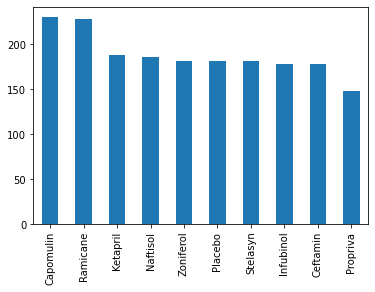

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = clean_data['Drug Regimen'].value_counts()
#print(row_counts)
row_counts.plot(kind='bar')
plt.show()

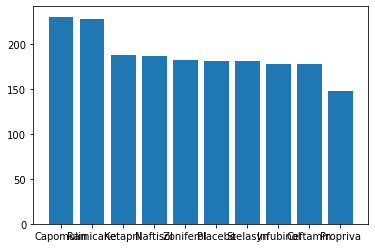

In [64]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(row_counts.index,row_counts.values)
plt.show()

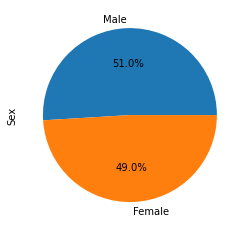

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = clean_data['Sex'].value_counts()

male_female.plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen